<a href="https://colab.research.google.com/github/matteoalberti/Lectures_AdvCV_Experis2020/blob/main/DL4CV_3_Thought_Pre_Trained_Models_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/matteoalberti/Lectures_introCV_Experis2020/blob/main/images/intro.jpg?raw=1)

# **Welcome!**

# Introduction to Machine Learning for Computer Vision

#### Thought Pre-Trained Models!


## **Lecturer :** Matteo Alberti

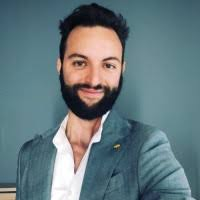

*Contacts :* https://www.linkedin.com/in/matteo-alberti-170493/


# Summary


- <font color=E35F2A>**Transfer Learning & Pre-Trained Models** </font>


#### Load Packages

In [ ]:
#Sklearn ML
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import numpy as np
import platform
import keras

#TF Imports
import tensorflow as tf
import sklearn.model_selection as model_selection
import datetime
import pandas as pd


#Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

print('TF Version : ',tf.__version__)
print('Python Version : ', platform.python_version())

TF Version :  2.3.0
Python Version :  3.6.9


## Load Cifar100 this time!

This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).

Divided in **Supercalsses and Classes**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

#The range for each individual colour is 0-255
x_train = x_train.astype('float32')/255 
x_test = x_test.astype('float32')/255

169009152/169001437 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [ ]:
# check size
x_train.size // 1024 // 1024

146

In [ ]:
len(x_train)

50000

##### Visulize Data & Stats

##### Normalize data

In [ ]:
#The range for each individual colour is 0-255
x_train = x_train.astype('float32')/255 
x_test = x_test.astype('float32')/255

### Define HyperParameters & CNN Architecture
   

In [ ]:
#Parameters
import sys;import argparse; sys.argv=['']; del sys
parser = argparse.ArgumentParser(description="CNN")
parser.add_argument('--epochs', default=20, type=int)
parser.add_argument('--iter', default=100, type=int)
parser.add_argument('--batch_size', default=128, type=int)
parser.add_argument('--lr', default=0.001, type=float)

#For VGG
parser.add_argument('--weight_decay', default=0.0001, type=float)
parser.add_argument('--dropout', default=0.5, type=float)


parser.add_argument('--height', default=32, type=int)
parser.add_argument('--width', default=32, type=int)
parser.add_argument('--channel', default=3, type=int)
parser.add_argument('--classes', default=10, type=int)

#FOR RESNET
parser.add_argument('--stack_n', type=int, default=25, metavar='NUMBER',
                help='stack number n, total layers = 6 * n + 2 (default: 5)')

parser.add_argument('--train', default=False)
args = parser.parse_args()

layers_res = 6 * args.stack_n + 2
parser.add_argument('--layers_res', default=layers_res)

#Extras
parser.add_argument('--early_stop', default=3)


args = parser.parse_args()

print(args)

Namespace(batch_size=128, channel=3, classes=10, dropout=0.5, early_stop=3, epochs=20, height=32, iter=100, layers_res=152, lr=0.001, stack_n=25, train=False, weight_decay=0.0001, width=32)


# Thought deep pre-trained models - [Part 1]

### Visual Geometry Group Network 

<img src="https://www.researchgate.net/profile/Max_Ferguson/publication/322512435/figure/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png" alt="Drawing" style="width: 500px;"/>

### Start with loading weights

- Which weights can I load?
- What have I to modify?

In [6]:
vgg19 = tf.keras.applications.VGG19(
    include_top=False, weights='imagenet', input_tensor=None, input_shape=(32,32,3),
    pooling=None, classes=100, classifier_activation='softmax')

#Compile architecture
vgg19.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

vgg19.summary()

80142336/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

### Evaluate how good is our model without training!


In [ ]:
score = vgg19.evaluate(x_test, y_test, verbose=0)
print(score[0], ' : loss')
print(score[1]*100, '% : acc')

# Why?? What happened???

16.92310905456543  : loss
0.0 % : acc


## Let's go step-by-step

### Define layers to be added

In [1]:
import tensorflow as tf

In [4]:
flatten = tf.keras.layers.Flatten()
dense1 = tf.keras.layers.Dense(200, activation='relu')
dense2 = tf.keras.layers.Dense(100, activation='softmax')

### Re-define our model

In [11]:
inputs = tf.keras.Input(shape=(32,32, 3))
x = vgg19(inputs, training=False)
x = tf.keras.layers.Flatten()(x)
x = dense1(x)
outputs = dense2(x)
vgg19_DP = tf.keras.Model(inputs, outputs)

In [12]:
vgg19_DP.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               102600    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
Total params: 20,147,084
Trainable params: 20,147,084
Non-trainable params: 0
_________________________________________________________________


#### RE-compile and summary

In [13]:
#Compile architecture
vgg19_DP.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

vgg19_DP.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               102600    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
Total params: 20,147,084
Trainable params: 20,147,084
Non-trainable params: 0
_________________________________________________________________


# And now? What should we do?

![](https://drive.google.com/uc?export=view&id=1k9_HZH4LhYpbseIvRgQ-1ko6UF4C_hEb)

### Freeze Parameters

In [16]:
vgg19.trainable = False
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [18]:
vgg19_DP.trainable = True
vgg19.trainable = False

vgg19_DP.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               102600    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
Total params: 20,147,084
Trainable params: 122,700
Non-trainable params: 20,024,384
_________________________________________________________________


## Evaluate directly!

In [ ]:
# define callbacks

%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# start train 
history_VGG = vgg19_DP.fit(x=x_train, 
          y=y_train, 
          epochs=5,
          validation_split=0.2, 
          callbacks=[tensorboard_callback], verbose=1)

score = vgg19_DP.evaluate(x_test, y_test, verbose=0)
print(score[0], ' : loss')
print(score[1]*100, '% : acc')

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/5
1250/1250 [==============================] - 18s 14ms/step - loss: 2765401.5000 - accuracy: 0.0106 - val_loss: 4.6050 - val_accuracy: 0.0104
Epoch 2/5
1250/1250 [==============================] - 18s 14ms/step - loss: 4.6055 - accuracy: 0.0098 - val_loss: 4.6056 - val_accuracy: 0.0086
Epoch 3/5
1250/1250 [==============================] - 18s 14ms/step - loss: 4.6055 - accuracy: 0.0101 - val_loss: 4.6064 - val_accuracy: 0.0084
Epoch 4/5
1250/1250 [==============================] - 18s 14ms/step - loss: 4.6056 - accuracy: 0.0098 - val_loss: 4.6071 - val_accuracy: 0.0084
Epoch 5/5
1250/1250 [==============================] - 18s 14ms/step - loss: 4.6056 - accuracy: 0.0095 - val_loss: 4.6074 - val_accuracy: 0.0084
4.6053972244262695  : loss
0.9999999776482582 % : acc


## Transfer Learning as Weights Initialization

In [ ]:
vgg19_WI = vgg19_DP
vgg19_WI.trainable = True
vgg19_WI.summary()

Model: "functional_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 250)               128250    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               25100     
Total params: 20,177,734
Trainable params: 20,177,734
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# define callbacks

%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# start train 
history_VGG = vgg19_WI.fit(x=x_train, 
          y=y_train, 
          epochs=5,
          validation_split=0.2, 
          callbacks=[tensorboard_callback], verbose=1)

score = vgg19_WI.evaluate(x_test, y_test, verbose=0)
print(score[0], ' : loss')
print(score[1]*100, '% : acc')

![](https://github.com/matteoalberti/Lectures_introCV_Experis2020/blob/main/images/DL4CV1.png?raw=1)

## Transfer Learning as Features Extractor

In [ ]:
pd.set_option('max_colwidth', -1)

layers = [(layer.name, layer.trainable) for layer in vgg19_WI.layers]
layers_initial = [(layer.name, layer.trainable) for layer in vgg19.layers]

vgg_initial = pd.DataFrame(layers_initial, columns=['Layer Name', 'Layer Trainable'])
vgg_model = pd.DataFrame(layers, columns=['Layer Name', 'Layer Trainable'])

vgg_trainable = pd.concat([vgg_initial, vgg_model[2:]])

vgg_trainable.head(100)

__main__:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Name,Layer Trainable
0,input_14,True
1,block1_conv1,True
2,block1_conv2,True
3,block1_pool,True
4,block2_conv1,True
5,block2_conv2,True
6,block2_pool,True
7,block3_conv1,True
8,block3_conv2,True
9,block3_conv3,True


## Freeze only some layers

In [19]:
vgg19.layers

In [ ]:
# Freeze all the layers before the `fine_tune_at` layer
for layer in vgg19.layers[:10]:
  layer.trainable =  False


pd.set_option('max_colwidth', -1)

layers = [(layer.name, layer.trainable) for layer in vgg19_WI.layers]
layers_initial = [(layer.name, layer.trainable) for layer in vgg19.layers]

vgg_initial = pd.DataFrame(layers_initial, columns=['Layer Name', 'Layer Trainable'])
vgg_model = pd.DataFrame(layers, columns=['Layer Name', 'Layer Trainable'])

vgg_trainable = pd.concat([vgg_initial, vgg_model[2:]])

vgg_trainable.head(100)

__main__:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Name,Layer Trainable
0,input_14,False
1,block1_conv1,False
2,block1_conv2,False
3,block1_pool,False
4,block2_conv1,False
5,block2_conv2,False
6,block2_pool,False
7,block3_conv1,False
8,block3_conv2,False
9,block3_conv3,False


## Which are the main problems with this kind of apporach?

- Why Models are defined and we have to read so many papers?
    - Is our model robust?

- But when we have some time/consumption-constraints we need to achieve a fast solution

*In Deep Learning we have always to think about what we are doing*

If we want to do customs methods we should at least find a way to **Evaluate** how our models are working


##### Load fashion_mnist from tf.keras.datasets

*Check interactive visualization :*
https://github.com/zalandoresearch/fashion-mnist

##   Think about the following situations :

- From Cifar100 --> Cifar10

Answer :

- From Cifar10 --> Cifar100

Answer :

- From Cifar100 --> Fashion_Mnist

Answer :

- From Cifar10 --> Fashion_Mnist

Answer :